# Lab | Cleaning numerical data

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. 

You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

* Retain customers,
* Analyze relevant customer data,
* Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### 1. Import the necessary libraries.

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import datetime
import re
import math
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.customer_df = pd.read_csv('C:/Student/IRONHACK/Week4/D1_DataCleaning/Labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

In [78]:
customer_df = pd.read_csv('C:/Student/IRONHACK/Week4/D1_DataCleaning/Labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 3. First look at its main features (head, shape, info).

In [79]:
customer_df.head()
customer_df.shape
customer_df.info()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case).

In [80]:
# Option1
customer_df.columns = customer_df.columns.str.lower()
customer_df.columns = [re.sub(' ','_',i) for i in customer_df.columns]
customer_df.head()

# Option2
# customer_df.columns = customer_df.columns.str.lower()
# customer_df.columns = customer_df.columns.str.replace(' ', '_')
# customer_df.head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 5. Change effective to date column to datetime format.

In [81]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 6. Check NaN values per column.

In [82]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### 7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [83]:
# FUNCTION FAILED #1
# continuous = pd.DataFrame({})
# discrete = pd.DataFrame({}) 
# def catcont(x):
#     if x.dtypes == ('float64') :
#         continuous.concat([continuous,pd.DataFrame(x)], axis=0)
#     else:
#         discrete.concat([discrete,pd.DataFrame(x)], axis=0)
    
def catcont(x):
    if len(x.value_counts()) > 100:
        return 'continuous'
    else:
        return 'discrete' 

In [84]:
numerical = customer_df.select_dtypes(include = np.number)
categorical = customer_df.select_dtypes(include = np.object)
numerical.dtypes;

In [85]:
numerical.head();

In [86]:
numerical.apply(catcont)
# catcont(numerical)

customer_lifetime_value          continuous
income                           continuous
monthly_premium_auto             continuous
months_since_last_claim            discrete
months_since_policy_inception      discrete
number_of_open_complaints          discrete
number_of_policies                 discrete
total_claim_amount               continuous
dtype: object

In [87]:
discrete = numerical.drop(['income', 'total_claim_amount', 'monthly_premium_auto', 'customer_lifetime_value'], axis=1)
discrete.head()
continuous = numerical.loc[:,['income', 'total_claim_amount', 'monthly_premium_auto', 'customer_lifetime_value']]
continuous.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


,income,total_claim_amount,monthly_premium_auto,customer_lifetime_value
0,56274,384.811147,69,2763.519279
1,0,1131.464935,94,6979.535903
2,48767,566.472247,108,12887.431650
3,0,529.881344,106,7645.861827
4,43836,138.130879,73,2813.692575


### 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [88]:
categorical.nunique()

for x in categorical:
    categorical[x].value_counts()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

RT60959    1
QN67807    1
SJ95423    1
UG49494    1
MH76107    1
          ..
MT78037    1
IZ79227    1
ET39822    1
SE47384    1
GZ31904    1
Name: customer, Length: 9134, dtype: int64

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

### 9. Get categorical features.

In [89]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 10. What should we do with the customer_id column?

In [90]:
# categorical['customer'].nunique() == len(categorical)
# categorical.set_index('customer', inplace = True)

In [91]:
# Won't be considered 
categorical.drop(['customer'], axis=1, inplace=True)

C:\Users\besca\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Lab | Cleaning categorical data

### 1. Import the necessary libraries if you are starting a new notebook.

In [92]:
# all imported

### 2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [93]:
continuous_df = continuous
discrete_df = discrete
continuous_df
discrete_df

,income,total_claim_amount,monthly_premium_auto,customer_lifetime_value
0,56274,384.811147,69,2763.519279
1,0,1131.464935,94,6979.535903
2,48767,566.472247,108,12887.431650
3,0,529.881344,106,7645.861827
4,43836,138.130879,73,2813.692575
...,...,...,...,...
9129,71941,198.234764,73,23405.987980
9130,21604,379.200000,79,3096.511217
9131,0,790.784983,85,8163.890428
9132,21941,691.200000,96,7524.442436


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


### 3. Plot a correlation matrix, what can you see?

<AxesSubplot:>

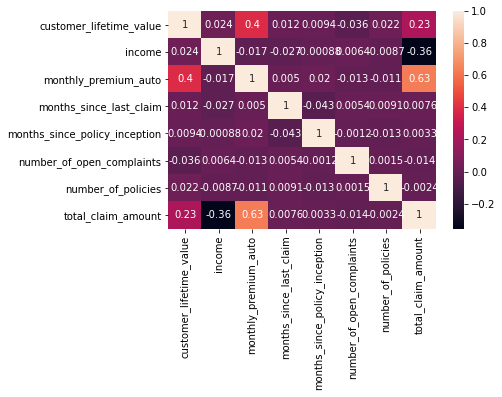

In [94]:
corr_matrix = numerical.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### 4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [95]:
# FUNCTION FAILED #2
def graphs(x):
    if x in discrete_df:
        return sns.boxplot(x)
    else: 
        pass

In [96]:
# discrete_df.apply(graphs)
# graphs(discrete_df)

In [97]:
# for i in discrete_df.columns:
#     sns.displot(discrete_df[i])
#     plt.show()
    
# for i in range(len(continuous_df.columns)):
#     sns.distplot(continuous_df.iloc[:,i],bins=20)
#     plt.show()


In [98]:
# for i in discrete_df.columns:
#     sns.displot(discrete_df[i])
#     plt.show()
    
# for i in range(len(continuous_df.columns)):
#     sns.distplot(continuous_df.iloc[:,i],bins=20)
#     plt.show()

# for i in continuous_df.columns:
#     sns.violinplot(continuous_df[i])
#     plt.show()


In [99]:
# def plot_con_box(df):
#     for i in range(len(col_names_c)):
#         sns.boxplot(df.iloc[:,i])
#         plt.show()
        
# plot_con_box(continuous_df)

# for i in range(len(categorical_df.columns)):
#         sns.countplot(categorical_df.iloc[:,i])
#         plt.show()


In [100]:
continuous_df.dtypes

income                       int64
total_claim_amount         float64
monthly_premium_auto         int64
customer_lifetime_value    float64
dtype: object

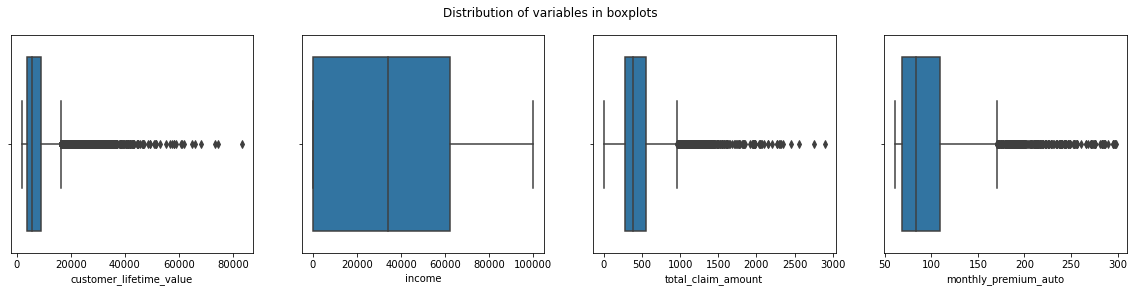

In [101]:
fig, axes = plt.subplots(1,4,  figsize=(20, 4))

fig.suptitle('Distribution of variables in boxplots')

sns.boxplot(ax=axes[0],data= customer_df, x= 'customer_lifetime_value')
sns.boxplot(ax=axes[1],data= customer_df, x= 'income')
sns.boxplot(ax=axes[2],data= customer_df, x= 'total_claim_amount')
sns.boxplot(ax=axes[3],data= customer_df, x= 'monthly_premium_auto');




In [102]:
discrete_df.dtypes

months_since_last_claim          int64
months_since_policy_inception    int64
number_of_open_complaints        int64
number_of_policies               int64
dtype: object

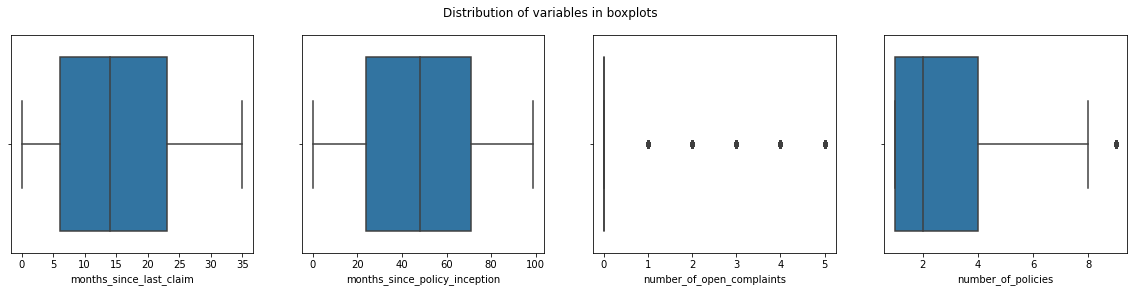

In [103]:
fig, axes = plt.subplots(1,4,  figsize=(20, 4))

fig.suptitle('Distribution of variables in boxplots')

sns.boxplot(ax=axes[0],data= customer_df, x= 'months_since_last_claim' )
sns.boxplot(ax=axes[1],data= customer_df, x= 'months_since_policy_inception' )
sns.boxplot(ax=axes[2],data= customer_df, x= 'number_of_open_complaints')
sns.boxplot(ax=axes[3],data= customer_df, x= 'number_of_policies');

### 5. What can you see in the plots?

In [104]:
# Monthly_premium_auto has quite a lot of outliers
# Looks like number_of_open_compaints can be categorical, so maybe we should convert it 

In [105]:
# discrete_df = discrete_df.astype({'number_of_open_compaints':'object'})

### 6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

In [106]:
# for i in continuous_df.columns:
#     sns.violinplot(continuous_df[i])
#     plt.show()

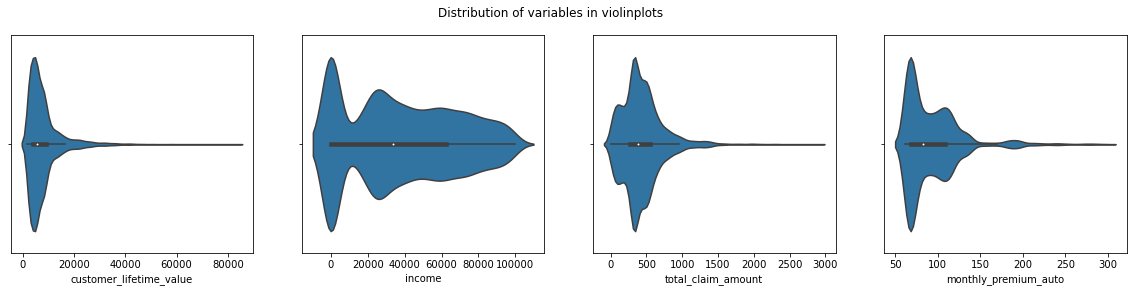

In [107]:
fig, axes = plt.subplots(1,4,  figsize=(20, 4))

fig.suptitle('Distribution of variables in violinplots')

sns.violinplot(ax=axes[0],data= customer_df, x= 'customer_lifetime_value')
sns.violinplot(ax=axes[1],data= customer_df, x= 'income')
sns.violinplot(ax=axes[2],data= customer_df, x= 'total_claim_amount')
sns.violinplot(ax=axes[3],data= customer_df, x= 'monthly_premium_auto');

In [108]:
# FUNCTION FAILED #3
# def continuous_check_outliers(x):
#     for x in continuous_df:
#         iqr = np.percentile(continuous_df[x],75) - np.percentile(continuous_df[x],25)
#         upper_limit = np.percentile(continuous_df[x],75) + 1.5*iqr
#         extraordinary_points = continuous_df[continuous_df[x] > upper_limit]
#         return len(extraordinary_points)

In [109]:
# continuous_df.apply(continuous_check_outliers)

In [110]:
iqr = np.percentile(continuous_df['monthly_premium_auto'],75) - np.percentile(continuous_df['monthly_premium_auto'],25)
upper_limit = np.percentile(continuous_df['monthly_premium_auto'],75) + 1.5*iqr
extraordinary_points = continuous_df[continuous_df['monthly_premium_auto'] > upper_limit]
len(extraordinary_points)  # THis checks the number of points that will be removed

430

In [111]:
iqr = np.percentile(continuous_df['total_claim_amount'],75) - np.percentile(continuous_df['income'],25)
upper_limit = np.percentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)
extraordinary_points = continuous_df[continuous_df['total_claim_amount'] > upper_limit]
len(extraordinary_points)  # THis checks the number of points that will be removed

1368.7870968750003


116

In [112]:
iqr = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)
extraordinary_points = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit]
len(extraordinary_points)  # THis checks the number of points that will be removed

16414.039911750002


817

In [113]:
customer_df.shape

(9134, 24)

### 7. Have you found outliers? If you have, what should we do with them?

In [114]:
# After discussing with the group and analysing the distribution of the numerical variables, we understand that Customer_Lifetime_Value, Income, Total_Claim_Amount and Monthly_Premium_Auto have a very disperse distribution. 
# However, removing outliers would be a big mistake as we can see how they are all representative of a specific target group which it is also one of the most profitable for the insurance company
# The suggestion then would be to separate them from the more normally distributed cases, group them in a new dataset, and ask the business to run two different analysis on the two newly-created datasets!

### 8. Check nan values per column.

In [115]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Lab | Feature extraction

### 1. Open the categoricals variable we created before.

In [116]:
categorical.head()
categorical.columns

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

### 2. Plot all the categorical variables with the proper plot. What can you see?

Text(0.5, 0.98, 'Distribution of variables in countplots')

<AxesSubplot:xlabel='state', ylabel='count'>

<AxesSubplot:xlabel='response', ylabel='count'>

<AxesSubplot:xlabel='coverage', ylabel='count'>

<AxesSubplot:xlabel='education', ylabel='count'>

<AxesSubplot:xlabel='employmentstatus', ylabel='count'>

<AxesSubplot:xlabel='gender', ylabel='count'>

<AxesSubplot:xlabel='location_code', ylabel='count'>

<AxesSubplot:xlabel='marital_status', ylabel='count'>

<AxesSubplot:xlabel='policy_type', ylabel='count'>

<AxesSubplot:xlabel='policy', ylabel='count'>

<AxesSubplot:xlabel='renew_offer_type', ylabel='count'>

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

<AxesSubplot:xlabel='vehicle_class', ylabel='count'>

<AxesSubplot:xlabel='vehicle_size', ylabel='count'>

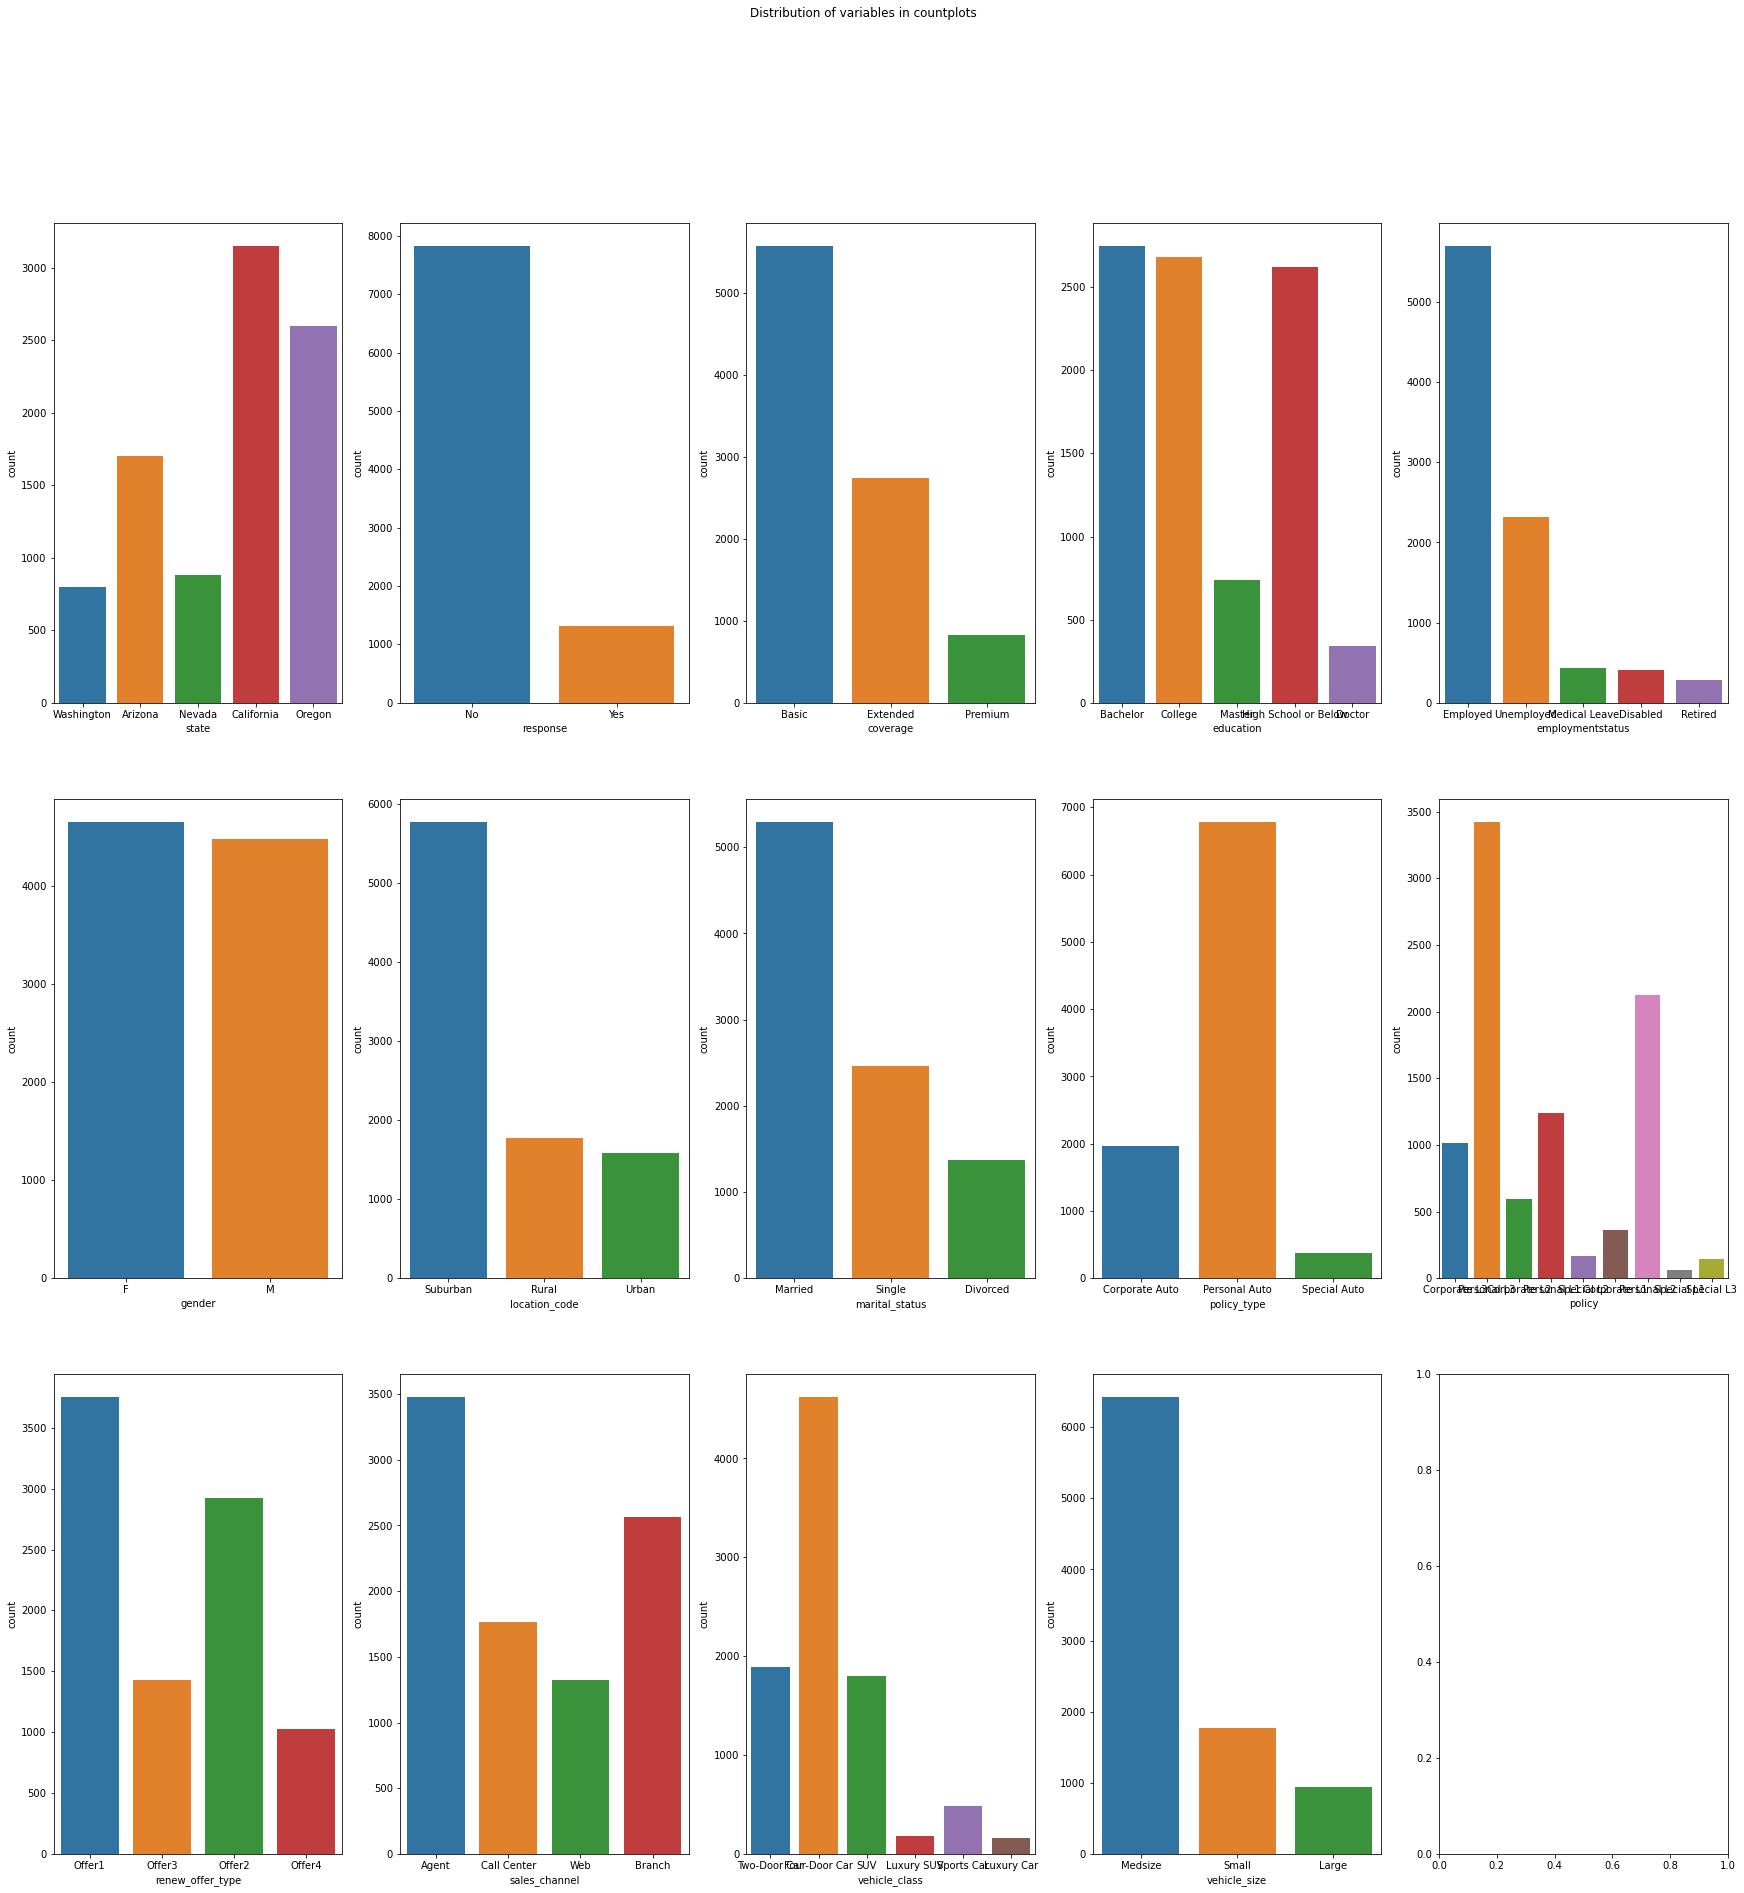

In [117]:
fig, axes = plt.subplots(3,5,  figsize=(30, 30))

fig.suptitle('Distribution of variables in countplots')

sns.countplot(ax=axes[0,0],data= customer_df, x= 'state' )
sns.countplot(ax=axes[0,1],data= customer_df, x= 'response' )
sns.countplot(ax=axes[0,2],data= customer_df, x= 'coverage')
sns.countplot(ax=axes[0,3],data= customer_df, x= 'education')
sns.countplot(ax=axes[0,4],data= customer_df, x= 'employmentstatus')
sns.countplot(ax=axes[1,0],data= customer_df, x= 'gender')
sns.countplot(ax=axes[1,1],data= customer_df, x= 'location_code')
sns.countplot(ax=axes[1,2],data= customer_df, x= 'marital_status')
sns.countplot(ax=axes[1,3],data= customer_df, x= 'policy_type')
sns.countplot(ax=axes[1,4],data= customer_df, x= 'policy')
sns.countplot(ax=axes[2,0],data= customer_df, x= 'renew_offer_type')
sns.countplot(ax=axes[2,1],data= customer_df, x= 'sales_channel')
sns.countplot(ax=axes[2,2],data= customer_df, x= 'vehicle_class')
sns.countplot(ax=axes[2,3],data= customer_df, x= 'vehicle_size')

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

The variables coverage and maritual status have similar distributions so we have checked if they are correlated. They are not so there is no reason to drop any of the variables.

In [118]:
data_crosstab = pd.crosstab(categorical['coverage'], categorical['marital_status'], margins = False)
data_crosstab

marital_status,Divorced,Married,Single
coverage,,,
Basic,825,3247,1496
Extended,427,1573,742
Premium,117,478,229


In [119]:
st.chi2_contingency(data_crosstab)

(1.5917156364713243,
 0.810280319861366,
 4,
 array([[ 834.52945041, 3229.61068535, 1503.85986424],
        [ 410.96978323, 1590.44405518,  740.58616159],
        [ 123.50076637,  477.94525947,  222.55397416]]))

In [120]:
# WRITE A FUNCTION TO CHECK CORRELATION BETWEEN ALL VARIABLES
# WRITE A FUNCTION TO SHOW THAT POLICY TYPE IS THE SUM OF POLICY AND ERASE POLICY
# data['policy'].count('Personal L3')
# data.pivot_table(index=['policy'],values=['customer'],aggfunc={'count'})


# data_crosstab = pd.crosstab(data['policy'], data['policy_type'], margins = True)
# data_crosstab



In [121]:
categorical.drop(['policy'], axis=1, inplace=True)

C:\Users\besca\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 4. Plot time variable. Can you extract something from it?

<Figure size 1080x288 with 0 Axes>

<AxesSubplot:xlabel='effective_to_date', ylabel='Count'>

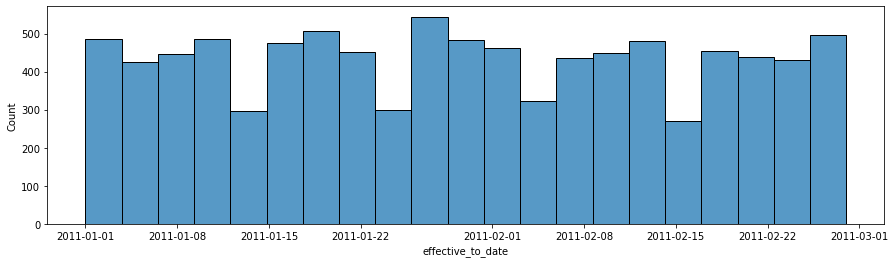

In [122]:
plt.figure(figsize=(15,4))
sns.histplot(data=customer_df, x="effective_to_date")

# Lab | Data cleaning and wrangling

### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [123]:
# After discussing with the group and analysing the distribution of the numerical variables, we understand that Customer_Lifetime_Value, Income, Total_Claim_Amount and Monthly_Premium_Auto have a very disperse distribution. 
# However, removing outliers would be a big mistake as we can see how they are all representative of a specific target group which it is also one of the most profitable for the insurance company
# The suggestion then would be to separate them from the more normally distributed cases, group them in a new dataset, and ask the business to run two different analysis on the two newly-created datasets!

### 2. Create a copy of the dataframe for the data wrangling.

In [124]:
df = pd.concat([continuous_df,categorical], axis= 1)

### 3. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [125]:
import datetime
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

In [126]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].apply(to_integer)
customer_df['effective_to_date'].head()

0    20110224
1    20110131
2    20110219
3    20110120
4    20110203
Name: effective_to_date, dtype: int64

### 4. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

Every column is numerical

# Lab | Comparing regression models

### 1. Try a simple linear regression with all the data to see whether we are getting good results.

#### Separate x/y

In [127]:
y = df['total_claim_amount']
X= df.drop(['total_claim_amount'], axis=1)
y.shape
X.shape
# numerical_train = df.select_dtypes(include = np.number)
# categorical_train = df.select_dtypes(include = np.object)

(9134,)

(9134, 16)

#### Train, test split 

In [128]:
# Splitting into train set and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
X_train.head()

,income,monthly_premium_auto,customer_lifetime_value,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
3774,53133,91,6938.874476,Oregon,No,Extended,Bachelor,Employed,M,Suburban,Single,Personal Auto,Offer2,Agent,Two-Door Car,Small
3441,0,72,2454.589361,Oregon,No,Basic,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer2,Branch,Two-Door Car,Medsize
3560,58713,98,3910.697956,Arizona,No,Extended,Bachelor,Employed,F,Suburban,Married,Special Auto,Offer1,Agent,Four-Door Car,Small
6034,72661,83,6639.328932,Nevada,No,Extended,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Branch,Four-Door Car,Small
8904,18820,95,6480.099944,California,No,Extended,Bachelor,Medical Leave,M,Suburban,Married,Personal Auto,Offer1,Branch,Two-Door Car,Small


#### Select numerical variables in the train

In [129]:
numerical_train = X_train.select_dtypes(include = np.number)
numerical_train.shape

(6850, 3)

##### Apply transformation to numericals 

In [130]:
# scaling standard scaler: make data normal distributed with mean=0 and std=1
transformer = StandardScaler().fit(numerical_train)
num_standardized = transformer.transform(numerical_train)
print(num_standardized.shape)
train_num_stand = pd.DataFrame(num_standardized, columns=numerical_train.columns)

(6850, 3)


#### Select categorical variables in the train and test

In [131]:
categorical_train = X_train.select_dtypes(include = np.object)
categorical_train.shape

(6850, 13)

##### Encode categoricals

In [132]:
categorical_train['coverage'] = categorical_train['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
categorical_train['education'] = categorical_train['education'].map({'Bachelor' : 1, 'College' : 1, 'High School or Below' : 0, 'Master': 2, 'Doctor':3})
categorical_train['vehicle_size'] = categorical_train['vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})
categorical_train['employmentstatus'] = categorical_train['employmentstatus'].map({'Medical Leave': 0, 'Disabled' : 1,'Retired': 2, 'Unemployed':3, 'Employed':4})
categorical_train['location_code'] = categorical_train['location_code'].map({'Urban' : 0, 'Suburban' : 1, 'Rural' : 2})

train_categorical_encoded = categorical_train[['coverage','education','vehicle_size','employmentstatus','location_code']]

C:\Users\besca\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\besca\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\besca\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [133]:
train_categorical_onehot = X_train[['state','response','gender','marital_status', 'policy_type','renew_offer_type', 'sales_channel', 'vehicle_class']]
train_categorical_onehot.shape

(6850, 8)

In [134]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(train_categorical_onehot)
train_onehot = encoder.transform(train_categorical_onehot).toarray()
enc = [columname for sublist in encoder.categories_ for columname in sublist]
train_onehot = pd.DataFrame(train_onehot,columns=enc)
train_onehot.shape
train_onehot.head()

(6850, 29)

,Arizona,California,Nevada,Oregon,Washington,No,Yes,F,M,Divorced,...,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [135]:
train_categorical_encoded.reset_index(drop=True, inplace=True)
train_onehot.reset_index(drop=True, inplace=True)

##### Concatenate categoricals

In [136]:
train_cat_enc = pd.concat([train_categorical_encoded,train_onehot], axis=1)
train_cat_enc.head()
train_cat_enc.shape

,coverage,education,vehicle_size,employmentstatus,location_code,Arizona,California,Nevada,Oregon,Washington,...,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,1,1,0,4,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,1,3,1,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,4,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,4,1,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


(6850, 34)

#### Get final train dataset

In [137]:
X_train_preproc = pd.concat([train_num_stand,train_cat_enc], axis= 1)

#### Modeling

In [138]:
# from sklearn import linear_model
lm = linear_model.LinearRegression()

In [139]:
model = lm.fit(X_train_preproc,y_train)

### VALIDATION

#### Select numerical variables in the test

In [140]:
numerical_test = X_test.select_dtypes(include = np.number)
numerical_test.shape

(2284, 3)

##### Apply transformation to numericals 

In [141]:
# scaling standard scaler: make data normal distributed with mean=0 and std=1
test_num_standardized = transformer.transform(numerical_test)
print(test_num_standardized.shape)
test_num_stand = pd.DataFrame(test_num_standardized, columns=numerical_test.columns)

(2284, 3)


#### Select categorical variables in the train and test

In [142]:
categorical_test = X_test.select_dtypes(include = np.object)
categorical_test.shape

(2284, 13)

##### Encode categoricals

In [143]:
categorical_test['coverage'] = categorical_test['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
categorical_test['education'] = categorical_test['education'].map({'Bachelor' : 1, 'College' : 1, 'High School or Below' : 0, 'Master': 2, 'Doctor':3})
categorical_test['vehicle_size'] = categorical_test['vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})
categorical_test['employmentstatus'] = categorical_test['employmentstatus'].map({'Medical Leave': 0, 'Disabled' : 1,'Retired': 2, 'Unemployed':3, 'Employed':4})
categorical_test['location_code'] = categorical_test['location_code'].map({'Urban' : 0, 'Suburban' : 1, 'Rural' : 2})

test_categorical_encoded = categorical_test[['coverage','education','vehicle_size','employmentstatus','location_code']]

C:\Users\besca\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\besca\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\besca\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [144]:
test_categorical_onehot = X_test[['state','response','gender','marital_status', 'policy_type','renew_offer_type', 'sales_channel', 'vehicle_class']]
test_categorical_onehot.shape

(2284, 8)

In [145]:
test_onehot = encoder.transform(test_categorical_onehot).toarray()
enc = [columname for sublist in encoder.categories_ for columname in sublist]
test_onehot = pd.DataFrame(test_onehot,columns=enc)
test_onehot.shape
test_onehot.head()

(2284, 29)

,Arizona,California,Nevada,Oregon,Washington,No,Yes,F,M,Divorced,...,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [146]:
test_categorical_encoded.reset_index(drop=True, inplace=True)
test_onehot.reset_index(drop=True, inplace=True)

##### Concatenate categoricals

In [147]:
test_cat_enc = pd.concat([test_categorical_encoded,test_onehot], axis=1)
test_cat_enc.head()
test_cat_enc.shape

,coverage,education,vehicle_size,employmentstatus,location_code,Arizona,California,Nevada,Oregon,Washington,...,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0,1,1,4,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,4,2,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,2,4,2,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,2,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,1,1,4,2,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


(2284, 34)

#### Get final test dataset

In [148]:
X_test_preproc = pd.concat([test_num_stand,test_cat_enc], axis= 1)
X_test_preproc.shape

(2284, 37)

### Validate model

In [149]:
predictions = lm.predict(X_test_preproc)
predictions

array([207.41328455, 507.72860875, 164.72589391, ..., 126.86365682,
       257.237375  , 429.00391521])

In [150]:
# R2.
r2 = r2_score(y_test, predictions)
print(r2)
# MSE.
mse = mean_squared_error(y_test, predictions)
# RMSE.
rmse = math.sqrt(mse)

0.6116464453255892


### 2. Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [201]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
from sklearn import linear_model

def linear_function(x):
    # train,test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=100)
    # TRAIN SET PREPARATION
    # transform numericals
    numerical_train = X_train.select_dtypes(include = np.number)
    transformer = StandardScaler().fit(numerical_train)
    num_standardized = transformer.transform(numerical_train)
    train_num_stand = pd.DataFrame(num_standardized, columns=numerical_train.columns)
    # encode categoricals
    categorical_train = X_train.select_dtypes(include = np.object)
    categorical_train['coverage'] = categorical_train['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
    categorical_train['education'] = categorical_train['education'].map({'Bachelor' : 1, 'College' : 1, 'High School or Below' : 0, 'Master': 2, 'Doctor':3})
    categorical_train['vehicle_size'] = categorical_train['vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})
    categorical_train['employmentstatus'] = categorical_train['employmentstatus'].map({'Medical Leave': 0, 'Disabled' : 1,'Retired': 2, 'Unemployed':3, 'Employed':4})
    categorical_train['location_code'] = categorical_train['location_code'].map({'Urban' : 0, 'Suburban' : 1, 'Rural' : 2})
    train_categorical_encoded = categorical_train[['coverage','education','vehicle_size','employmentstatus','location_code']];
    train_categorical_onehot = X_train[['state','response','gender','marital_status', 'policy_type','renew_offer_type', 'sales_channel', 'vehicle_class']]
    encoder = OneHotEncoder().fit(train_categorical_onehot)
    train_onehot = encoder.transform(train_categorical_onehot).toarray()
    enc = [columname for sublist in encoder.categories_ for columname in sublist]
    train_onehot = pd.DataFrame(train_onehot,columns=enc)
    train_categorical_encoded.reset_index(drop=True, inplace=True)
    train_onehot.reset_index(drop=True, inplace=True)
    train_cat_enc = pd.concat([train_categorical_encoded,train_onehot], axis=1)
    # final train set
    X_train_preproc = pd.concat([train_num_stand,train_cat_enc], axis= 1)
    # model
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train_preproc,y_train)
    # TEST SET PREPARATION
    # transform numericals
    numerical_test = X_test.select_dtypes(include = np.number)
    test_num_standardized = transformer.transform(numerical_test)
    test_num_stand = pd.DataFrame(test_num_standardized, columns=numerical_test.columns)
    # encode categoricals
    categorical_test = X_test.select_dtypes(include = np.object)
    categorical_test['coverage'] = categorical_test['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
    categorical_test['education'] = categorical_test['education'].map({'Bachelor' : 1, 'College' : 1, 'High School or Below' : 0, 'Master': 2, 'Doctor':3})
    categorical_test['vehicle_size'] = categorical_test['vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})
    categorical_test['employmentstatus'] = categorical_test['employmentstatus'].map({'Medical Leave': 0, 'Disabled' : 1,'Retired': 2, 'Unemployed':3, 'Employed':4})
    categorical_test['location_code'] = categorical_test['location_code'].map({'Urban' : 0, 'Suburban' : 1, 'Rural' : 2})
    test_categorical_encoded = categorical_test[['coverage','education','vehicle_size','employmentstatus','location_code']]
    test_categorical_onehot = X_test[['state','response','gender','marital_status', 'policy_type','renew_offer_type', 'sales_channel', 'vehicle_class']]
    test_onehot = encoder.transform(test_categorical_onehot).toarray()
    enc = [columname for sublist in encoder.categories_ for columname in sublist]
    test_onehot = pd.DataFrame(test_onehot,columns=enc)
    test_categorical_encoded.reset_index(drop=True, inplace=True)
    test_onehot.reset_index(drop=True, inplace=True)
    test_cat_enc = pd.concat([test_categorical_encoded,test_onehot], axis=1)
    # final test set
    X_test_preproc = pd.concat([test_num_stand,test_cat_enc], axis= 1)
    # VALIDATION
    predictions = lm.predict(X_test_preproc)
    r2 = r2_score(y_test, predictions)
    print(r2)


In [203]:
linear_function(0.2)
linear_function(0.3)
linear_function(0.25)
linear_function(0.15)

# for i in [0.2,0.3,0.25,0.15]:
#     models_function(i)

0.6044955821868562
0.6178899952683905
0.6116464453255892
0.6101250560580085


### 3. Use the function to check LinearRegressor and KNeighborsRegressor. You can check also the MLPRegressor for this task

In [204]:
from sklearn.neighbors import KNeighborsRegressor

def kneighbors_function(x):
    # train,test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=100)
    # TRAIN SET PREPARATION
    # transform numericals
    numerical_train = X_train.select_dtypes(include = np.number)
    transformer = StandardScaler().fit(numerical_train)
    num_standardized = transformer.transform(numerical_train)
    train_num_stand = pd.DataFrame(num_standardized, columns=numerical_train.columns)
    # encode categoricals
    categorical_train = X_train.select_dtypes(include = np.object)
    categorical_train['coverage'] = categorical_train['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
    categorical_train['education'] = categorical_train['education'].map({'Bachelor' : 1, 'College' : 1, 'High School or Below' : 0, 'Master': 2, 'Doctor':3})
    categorical_train['vehicle_size'] = categorical_train['vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})
    categorical_train['employmentstatus'] = categorical_train['employmentstatus'].map({'Medical Leave': 0, 'Disabled' : 1,'Retired': 2, 'Unemployed':3, 'Employed':4})
    categorical_train['location_code'] = categorical_train['location_code'].map({'Urban' : 0, 'Suburban' : 1, 'Rural' : 2})
    train_categorical_encoded = categorical_train[['coverage','education','vehicle_size','employmentstatus','location_code']];
    train_categorical_onehot = X_train[['state','response','gender','marital_status', 'policy_type','renew_offer_type', 'sales_channel', 'vehicle_class']]
    encoder = OneHotEncoder().fit(train_categorical_onehot)
    train_onehot = encoder.transform(train_categorical_onehot).toarray()
    enc = [columname for sublist in encoder.categories_ for columname in sublist]
    train_onehot = pd.DataFrame(train_onehot,columns=enc)
    train_categorical_encoded.reset_index(drop=True, inplace=True)
    train_onehot.reset_index(drop=True, inplace=True)
    train_cat_enc = pd.concat([train_categorical_encoded,train_onehot], axis=1)
    # final train set
    X_train_preproc = pd.concat([train_num_stand,train_cat_enc], axis= 1)
    # model
    neigh = KNeighborsRegressor(n_neighbors=2)
    neigh.fit(X_train_preproc, y_train)
    # TEST SET PREPARATION
    # transform numericals
    numerical_test = X_test.select_dtypes(include = np.number)
    test_num_standardized = transformer.transform(numerical_test)
    test_num_stand = pd.DataFrame(test_num_standardized, columns=numerical_test.columns)
    # encode categoricals
    categorical_test = X_test.select_dtypes(include = np.object)
    categorical_test['coverage'] = categorical_test['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
    categorical_test['education'] = categorical_test['education'].map({'Bachelor' : 1, 'College' : 1, 'High School or Below' : 0, 'Master': 2, 'Doctor':3})
    categorical_test['vehicle_size'] = categorical_test['vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})
    categorical_test['employmentstatus'] = categorical_test['employmentstatus'].map({'Medical Leave': 0, 'Disabled' : 1,'Retired': 2, 'Unemployed':3, 'Employed':4})
    categorical_test['location_code'] = categorical_test['location_code'].map({'Urban' : 0, 'Suburban' : 1, 'Rural' : 2})
    test_categorical_encoded = categorical_test[['coverage','education','vehicle_size','employmentstatus','location_code']]
    test_categorical_onehot = X_test[['state','response','gender','marital_status', 'policy_type','renew_offer_type', 'sales_channel', 'vehicle_class']]
    test_onehot = encoder.transform(test_categorical_onehot).toarray()
    enc = [columname for sublist in encoder.categories_ for columname in sublist]
    test_onehot = pd.DataFrame(test_onehot,columns=enc)
    test_categorical_encoded.reset_index(drop=True, inplace=True)
    test_onehot.reset_index(drop=True, inplace=True)
    test_cat_enc = pd.concat([test_categorical_encoded,test_onehot], axis=1)
    # final test set
    X_test_preproc = pd.concat([test_num_stand,test_cat_enc], axis= 1)
    # VALIDATION
    predictions = neigh.predict(X_test_preproc)
    r2 = r2_score(y_test, predictions)
    print(r2)

In [205]:
kneighbors_function(0.2)
kneighbors_function(0.3)
kneighbors_function(0.25)
kneighbors_function(0.15)

0.5738525691845462
0.5748224164538608
0.5828038146553478
0.603218260312739


In [206]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

def MLPRegressor_function(x):
    # train,test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=x, random_state=100)
    # TRAIN SET PREPARATION
    # transform numericals
    numerical_train = X_train.select_dtypes(include = np.number)
    transformer = StandardScaler().fit(numerical_train)
    num_standardized = transformer.transform(numerical_train)
    train_num_stand = pd.DataFrame(num_standardized, columns=numerical_train.columns)
    # encode categoricals
    categorical_train = X_train.select_dtypes(include = np.object)
    categorical_train['coverage'] = categorical_train['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
    categorical_train['education'] = categorical_train['education'].map({'Bachelor' : 1, 'College' : 1, 'High School or Below' : 0, 'Master': 2, 'Doctor':3})
    categorical_train['vehicle_size'] = categorical_train['vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})
    categorical_train['employmentstatus'] = categorical_train['employmentstatus'].map({'Medical Leave': 0, 'Disabled' : 1,'Retired': 2, 'Unemployed':3, 'Employed':4})
    categorical_train['location_code'] = categorical_train['location_code'].map({'Urban' : 0, 'Suburban' : 1, 'Rural' : 2})
    train_categorical_encoded = categorical_train[['coverage','education','vehicle_size','employmentstatus','location_code']];
    train_categorical_onehot = X_train[['state','response','gender','marital_status', 'policy_type','renew_offer_type', 'sales_channel', 'vehicle_class']]
    encoder = OneHotEncoder().fit(train_categorical_onehot)
    train_onehot = encoder.transform(train_categorical_onehot).toarray()
    enc = [columname for sublist in encoder.categories_ for columname in sublist]
    train_onehot = pd.DataFrame(train_onehot,columns=enc)
    train_categorical_encoded.reset_index(drop=True, inplace=True)
    train_onehot.reset_index(drop=True, inplace=True)
    train_cat_enc = pd.concat([train_categorical_encoded,train_onehot], axis=1)
    # final train set
    X_train_preproc = pd.concat([train_num_stand,train_cat_enc], axis= 1)
    # model
    regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_preproc, y_train)
    # TEST SET PREPARATION
    # transform numericals
    numerical_test = X_test.select_dtypes(include = np.number)
    test_num_standardized = transformer.transform(numerical_test)
    test_num_stand = pd.DataFrame(test_num_standardized, columns=numerical_test.columns)
    # encode categoricals
    categorical_test = X_test.select_dtypes(include = np.object)
    categorical_test['coverage'] = categorical_test['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
    categorical_test['education'] = categorical_test['education'].map({'Bachelor' : 1, 'College' : 1, 'High School or Below' : 0, 'Master': 2, 'Doctor':3})
    categorical_test['vehicle_size'] = categorical_test['vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})
    categorical_test['employmentstatus'] = categorical_test['employmentstatus'].map({'Medical Leave': 0, 'Disabled' : 1,'Retired': 2, 'Unemployed':3, 'Employed':4})
    categorical_test['location_code'] = categorical_test['location_code'].map({'Urban' : 0, 'Suburban' : 1, 'Rural' : 2})
    test_categorical_encoded = categorical_test[['coverage','education','vehicle_size','employmentstatus','location_code']]
    test_categorical_onehot = X_test[['state','response','gender','marital_status', 'policy_type','renew_offer_type', 'sales_channel', 'vehicle_class']]
    test_onehot = encoder.transform(test_categorical_onehot).toarray()
    enc = [columname for sublist in encoder.categories_ for columname in sublist]
    test_onehot = pd.DataFrame(test_onehot,columns=enc)
    test_categorical_encoded.reset_index(drop=True, inplace=True)
    test_onehot.reset_index(drop=True, inplace=True)
    test_cat_enc = pd.concat([test_categorical_encoded,test_onehot], axis=1)
    # final test set
    X_test_preproc = pd.concat([test_num_stand,test_cat_enc], axis= 1)
    # VALIDATION
    predictions = regr.predict(X_test_preproc)
    r2 = r2_score(y_test, predictions)
    print(r2)

In [207]:
MLPRegressor_function(0.2)
MLPRegressor_function(0.3)
MLPRegressor_function(0.25)
MLPRegressor_function(0.15)

0.8330178437298119
0.8361556494035252
0.8355428132697575
0.8338253029055833


### 4. Check and discuss the results.

After applying different algorithms to our dataset with different test sizes, we can conclude that MPL Regressor has yielded the best results in predicting the total claim amount of our future customers. 